In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## The HDF5 event files
The dataframes (called 'Particles') are stored in HDF5 files. There is one file for simulated 2vbb events, and one file for simulated background events. The backrounds simulated are Tl208, Bi214, Co60, and K40.

For the backgrounds, there is one entry per event, and for 2vbb, there are two entries per event (one for each primary electron). All of the 2vbb events can be keyed by the 'event' attribute, which is unique.

In [2]:
'''
Load in dataframes:
'''

fname = './files/Xe2nu_NEW_1d.h5'
bgfname = './files/BG_NEW_1d.h5'
df_particles = pd.read_hdf(fname, 'Particles')
df_bgparticles = pd.read_hdf(bgfname, 'Particles')

In [3]:
'''
Look at which variables are stored in 2vbb the dataframe:
'''
print('True MC 2vbb variables:')
print(df_particles.columns.tolist()[:17])
print()
print('Reconstructed 2vbb variables:')
print(df_particles.columns.tolist()[17:])

True MC 2vbb variables:
['particle_indx', 'particle_name', 'primary', 'kin_energy', 'initial_x', 'initial_y', 'initial_z', 'final_x', 'final_y', 'final_z', 'momentum_x', 'momentum_y', 'momentum_z', 'momentum', 'event', 'evt_energy', 'opening_angle']

Reconstructed 2vbb variables:
['nS2', 'reco_energy', 'reco_length', 'reco_numb_of_tracks', 'reco_x_min', 'reco_y_min', 'reco_z_min', 'reco_r_min', 'reco_x_max', 'reco_y_max', 'reco_z_max', 'reco_r_max', 'reco_x_ave', 'reco_y_ave', 'reco_z_ave', 'reco_r_ave', 'reco_extreme1_x', 'reco_extreme1_y', 'reco_extreme1_z', 'reco_extreme2_x', 'reco_extreme2_y', 'reco_extreme2_z', 'reco_blob1_x', 'reco_blob1_y', 'reco_blob1_z', 'reco_blob2_x', 'reco_blob2_y', 'reco_blob2_z', 'reco_eblob1', 'reco_eblob2', 'reco_ovlp_blob_energy']


In [4]:
'''
Look at which variables are stored in backgrounds the dataframe:
'''
print('True MC bg variables:')
print(df_bgparticles.columns.tolist()[:8])
print()
print('Reconstructed bg variables:')
print(df_bgparticles.columns.tolist()[8:])

True MC bg variables:
['event', 'initial_x', 'initial_y', 'initial_z', 'n_brems', 'n_electrons', 'mass_number', 'region']

Reconstructed bg variables:
['nS2', 'reco_energy', 'reco_length', 'reco_numb_of_tracks', 'reco_x_min', 'reco_y_min', 'reco_z_min', 'reco_r_min', 'reco_x_max', 'reco_y_max', 'reco_z_max', 'reco_r_max', 'reco_x_ave', 'reco_y_ave', 'reco_z_ave', 'reco_r_ave', 'reco_extreme1_x', 'reco_extreme1_y', 'reco_extreme1_z', 'reco_extreme2_x', 'reco_extreme2_y', 'reco_extreme2_z', 'reco_blob1_x', 'reco_blob1_y', 'reco_blob1_z', 'reco_blob2_x', 'reco_blob2_y', 'reco_blob2_z', 'reco_eblob1', 'reco_eblob2', 'reco_ovlp_blob_energy']


# Analysis cuts:
Recreate the NEXT NEW 2vbb analysis cuts:<br>
<img src="images/slide_procedure.png" width=600><br>
From Alberto's CM slides: <br>
https://next.ific.uv.es/DocDB/0009/000981/001/MC-data_efficiencies_studies_MC_november.pdf

/Users/woodruffk/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:19: RuntimeWarning: invalid value encountered in true_divide
/Users/woodruffk/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:20: RuntimeWarning: divide by zero encountered in true_divide


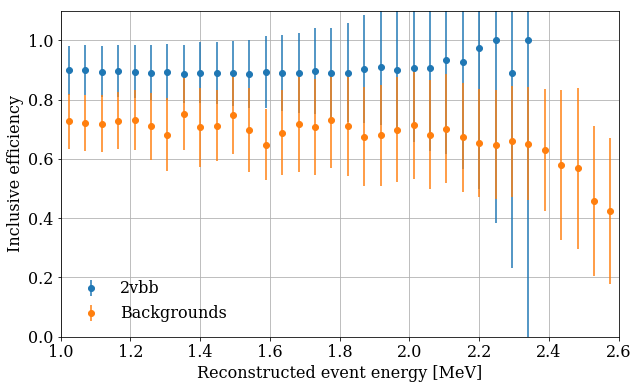

In [5]:
'''
Inclusive: (nS2 == 1)
'''

plt.figure(figsize=(10,6))

ebins = np.linspace(1,2.6,35)
bin_centers = (ebins[:-1] + ebins[1:])/2.

df_particles_cut1 = df_particles[df_particles['nS2'] == 1]
df_bgparticles_cut1 = df_bgparticles[df_bgparticles['nS2'] == 1]

energy_counts,_ = np.histogram(df_particles.groupby('event')['reco_energy'].first(), bins=ebins)
energy_counts_ns2,_ = np.histogram(df_particles_cut1.groupby('event')['reco_energy'].first(), bins=ebins)

bgenergy_counts,_ = np.histogram(df_bgparticles['reco_energy'], bins=ebins)
bgenergy_counts_ns2,_ = np.histogram(df_bgparticles_cut1['reco_energy'], bins=ebins)

ratio_ns2 = energy_counts_ns2/energy_counts
ratio_ns2_std = ratio_ns2 * np.sqrt(1./energy_counts_ns2 + 1./energy_counts)

bgratio_ns2 = bgenergy_counts_ns2/bgenergy_counts
bgratio_ns2_std = bgratio_ns2 * np.sqrt(1./bgenergy_counts_ns2 + 1./bgenergy_counts)

plt.errorbar(bin_centers, ratio_ns2, yerr=np.sqrt(ratio_ns2_std), fmt='o', label='2vbb')
plt.errorbar(bin_centers, bgratio_ns2, yerr=np.sqrt(bgratio_ns2_std), fmt='o', label='Backgrounds')

plt.grid(True)
plt.xlim(1.,2.6)
plt.ylim(0,1.1)

plt.tick_params(which='major', axis='both', labelsize=16)
plt.xlabel('Reconstructed event energy [MeV]', fontsize=16)
plt.ylabel('Inclusive efficiency', fontsize=16)

plt.legend(loc='lower left', fontsize=16)


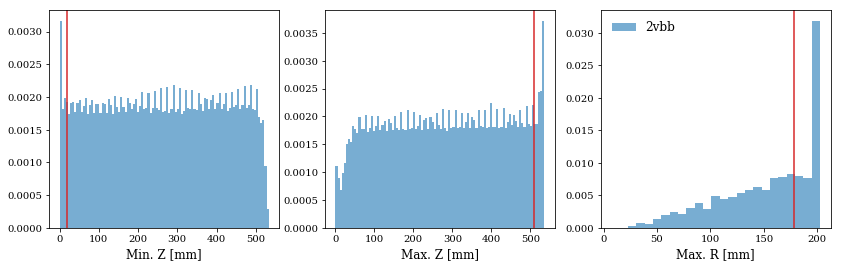

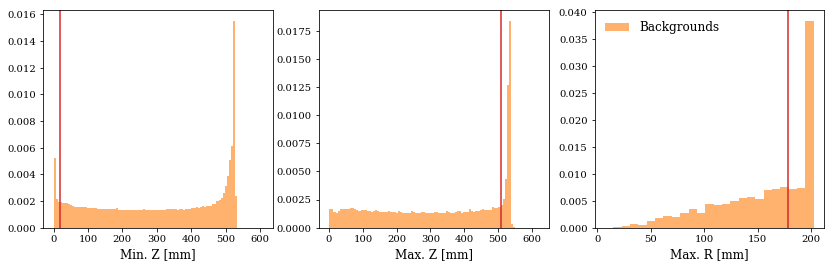

In [261]:
'''
Fiducial: (Zmin > 20 mm)&(Zmax < mm)&(Rmax < 178 mm)
'''

fig, ax = plt.subplots(ncols=3, figsize=(14,4))

ax[0].hist(df_particles_cut1.groupby('event')['reco_z_min'].first(), bins=100, color='C0', alpha=0.6, density=True);
ax[0].axvline(20, color='C3')

ax[1].hist(df_particles_cut1.groupby('event')['reco_z_max'].first(), bins=100, color='C0', alpha=0.6, density=True);
ax[1].axvline(510, color='C3')

ax[2].hist(df_particles_cut1.groupby('event')['reco_r_max'].first(), bins=25, color='C0', alpha=0.6, density=True, label='2vbb');
ax[2].axvline(178, color='C3')

ax[0].set_xlabel('Min. Z [mm]', fontsize=12)
ax[1].set_xlabel('Max. Z [mm]', fontsize=12)
ax[2].set_xlabel('Max. R [mm]', fontsize=12)

ax[2].legend(loc='upper left', fontsize=12)


fig, ax = plt.subplots(ncols=3, figsize=(14,4))

ax[0].hist(df_bgparticles_cut1.groupby('event')['reco_z_min'].first(), bins=100, color='C1', alpha=0.6, density=True);
ax[0].axvline(20, color='C3')

ax[1].hist(df_bgparticles_cut1.groupby('event')['reco_z_max'].first(), bins=100, color='C1', alpha=0.6, density=True);
ax[1].axvline(510, color='C3')

ax[2].hist(df_bgparticles_cut1.groupby('event')['reco_r_max'].first(), bins=25, color='C1', alpha=0.6, density=True, label='Backgrounds');
ax[2].axvline(178, color='C3')

ax[0].set_xlabel('Min. Z [mm]', fontsize=12)
ax[1].set_xlabel('Max. Z [mm]', fontsize=12)
ax[2].set_xlabel('Max. R [mm]', fontsize=12)

ax[2].legend(loc='upper left', fontsize=12)

/Users/woodruffk/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:19: RuntimeWarning: invalid value encountered in true_divide
/Users/woodruffk/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:20: RuntimeWarning: divide by zero encountered in true_divide


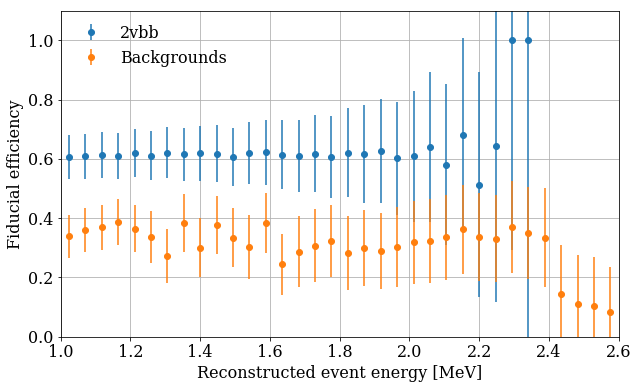

In [262]:
'''
Fiducial: (Zmin > 20 mm)&(Zmax < mm)&(Rmax < 178 mm)
'''

plt.figure(figsize=(10,6))

ebins = np.linspace(1,2.6,35)
bin_centers = (ebins[:-1] + ebins[1:])/2.

df_particles_cut2 = df_particles_cut1[(df_particles_cut1['reco_z_min'] > 20)&(df_particles_cut1['reco_z_max'] < 510)&(df_particles_cut1['reco_r_max'] < 178)]
df_bgparticles_cut2 = df_bgparticles_cut1[(df_bgparticles_cut1['reco_z_min'] > 20)&(df_bgparticles_cut1['reco_z_max'] < 510)&(df_bgparticles_cut1['reco_r_max'] < 178)]

energy_counts_ns2,_ = np.histogram(df_particles_cut1.groupby('event')['reco_energy'].first(), bins=ebins)
energy_counts_fid,_ = np.histogram(df_particles_cut2.groupby('event')['reco_energy'].first(), bins=ebins)

bgenergy_counts_ns2,_ = np.histogram(df_bgparticles_cut1['reco_energy'], bins=ebins)
bgenergy_counts_fid,_ = np.histogram(df_bgparticles_cut2['reco_energy'], bins=ebins)

ratio_fid = energy_counts_fid/energy_counts_ns2
ratio_fid_std = ratio_fid * np.sqrt(1./energy_counts_fid + 1./energy_counts_ns2)

bgratio_fid = bgenergy_counts_fid/bgenergy_counts
bgratio_fid_std = bgratio_fid * np.sqrt(1./bgenergy_counts_fid + 1./bgenergy_counts)

plt.errorbar(bin_centers, ratio_fid, yerr=np.sqrt(ratio_fid_std), fmt='o', label='2vbb')
plt.errorbar(bin_centers, bgratio_fid, yerr=np.sqrt(bgratio_fid_std), fmt='o', label='Backgrounds')

plt.grid(True)
plt.xlim(1.,2.6)
plt.ylim(0,1.1)

plt.tick_params(which='major', axis='both', labelsize=16)
plt.xlabel('Reconstructed event energy [MeV]', fontsize=16)
plt.ylabel('Fiducial efficiency', fontsize=16)

plt.legend(loc='upper left', fontsize=16)


/Users/woodruffk/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:19: RuntimeWarning: invalid value encountered in true_divide
/Users/woodruffk/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:20: RuntimeWarning: divide by zero encountered in true_divide


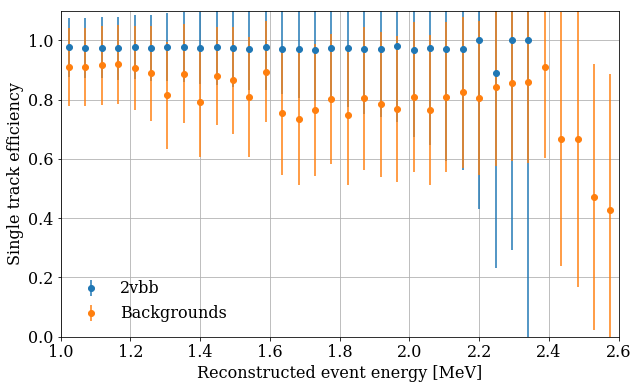

In [263]:
'''
Single track: (numb_of_tracks == 1)
'''

plt.figure(figsize=(10,6))

ebins = np.linspace(1,2.6,35)
bin_centers = (ebins[:-1] + ebins[1:])/2.

df_particles_cut3 = df_particles_cut2[df_particles_cut2['reco_numb_of_tracks'] == 1]
df_bgparticles_cut3 = df_bgparticles_cut2[df_bgparticles_cut2['reco_numb_of_tracks'] == 1]

energy_counts_fid,_ = np.histogram(df_particles_cut2.groupby('event')['reco_energy'].first(), bins=ebins)
energy_counts_1t,_ = np.histogram(df_particles_cut3.groupby('event')['reco_energy'].first(), bins=ebins)

bgenergy_counts_fid,_ = np.histogram(df_bgparticles_cut2['reco_energy'], bins=ebins)
bgenergy_counts_1t,_ = np.histogram(df_bgparticles_cut3['reco_energy'], bins=ebins)

ratio_1t = energy_counts_1t/energy_counts_fid
ratio_1t_std = ratio_1t * np.sqrt(1./energy_counts_1t + 1./energy_counts_fid)

bgratio_1t = bgenergy_counts_1t/bgenergy_counts_fid
bgratio_1t_std = bgratio_1t * np.sqrt(1./bgenergy_counts_1t + 1./bgenergy_counts_fid)

plt.errorbar(bin_centers, ratio_1t, yerr=np.sqrt(ratio_1t_std), fmt='o', label='2vbb')
plt.errorbar(bin_centers, bgratio_1t, yerr=np.sqrt(bgratio_1t_std), fmt='o', label='Backgrounds')

plt.grid(True)
plt.xlim(1.,2.6)
plt.ylim(0,1.1)

plt.tick_params(which='major', axis='both', labelsize=16)
plt.xlabel('Reconstructed event energy [MeV]', fontsize=16)
plt.ylabel('Single track efficiency', fontsize=16)

plt.legend(loc='lower left', fontsize=16)

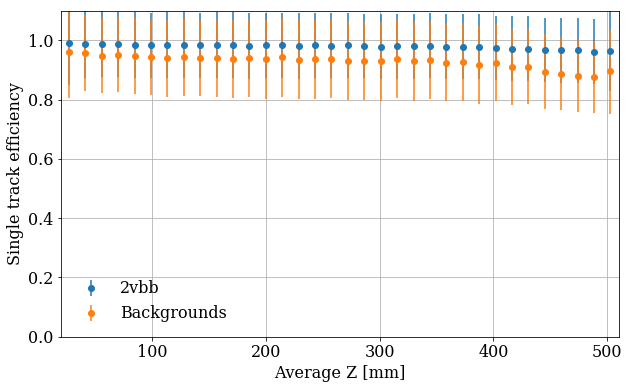

In [264]:
'''
Single track: (numb_of_tracks == 1)
'''

plt.figure(figsize=(10,6))

zbins = np.linspace(20,510,35)
bin_centers = (zbins[:-1] + zbins[1:])/2.

z_counts_fid,_ = np.histogram(df_particles_cut2.groupby('event')['reco_z_ave'].first(), bins=zbins)
z_counts_1t,_ = np.histogram(df_particles_cut3.groupby('event')['reco_z_ave'].first(), bins=zbins)

z_bgcounts_fid,_ = np.histogram(df_bgparticles_cut2.groupby('event')['reco_z_ave'].first(), bins=zbins)
z_bgcounts_1t,_ = np.histogram(df_bgparticles_cut3.groupby('event')['reco_z_ave'].first(), bins=zbins)

ratio_1t = z_counts_1t/z_counts_fid
ratio_1t_std = ratio_1t * np.sqrt(1./z_counts_1t + 1./z_counts_fid)

bgratio_1t = z_bgcounts_1t/z_bgcounts_fid
bgratio_1t_std = bgratio_1t * np.sqrt(1./z_bgcounts_1t + 1./z_bgcounts_fid)

plt.errorbar(bin_centers, ratio_1t, yerr=np.sqrt(ratio_1t_std), fmt='o', label='2vbb')
plt.errorbar(bin_centers, bgratio_1t, yerr=np.sqrt(bgratio_1t_std), fmt='o', label='Backgrounds')

plt.grid(True)
plt.xlim(20.,510.)
plt.ylim(0,1.1)

plt.tick_params(which='major', axis='both', labelsize=16)
plt.xlabel('Average Z [mm]', fontsize=16)
plt.ylabel('Single track efficiency', fontsize=16)

plt.legend(loc='lower left', fontsize=16)

/Users/woodruffk/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:19: RuntimeWarning: invalid value encountered in true_divide
/Users/woodruffk/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:20: RuntimeWarning: divide by zero encountered in true_divide


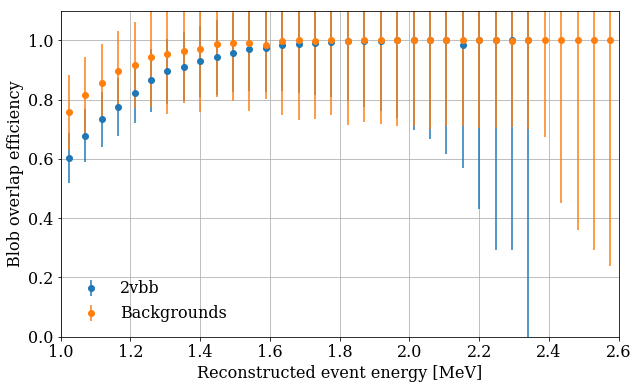

In [265]:
'''
Overlapped blob energy: (ovlp_blob == 0.0)
'''

plt.figure(figsize=(10,6))

ebins = np.linspace(1,2.6,35)
bin_centers = (ebins[:-1] + ebins[1:])/2.

df_particles_cut4 = df_particles_cut3[df_particles_cut3['reco_ovlp_blob_energy'] == 0.0]
df_bgparticles_cut4 = df_bgparticles_cut3[df_bgparticles_cut3['reco_ovlp_blob_energy'] == 0.0]

energy_counts_1t,_ = np.histogram(df_particles_cut3.groupby('event')['reco_energy'].first(), bins=ebins)
energy_counts_ovrl,_ = np.histogram(df_particles_cut4.groupby('event')['reco_energy'].first(), bins=ebins)

bgenergy_counts_1t,_ = np.histogram(df_bgparticles_cut3.groupby('event')['reco_energy'].first(), bins=ebins)
bgenergy_counts_ovrl,_ = np.histogram(df_bgparticles_cut4.groupby('event')['reco_energy'].first(), bins=ebins)

ratio_ovrl = energy_counts_ovrl/energy_counts_1t
ratio_ovrl_std = ratio_ovrl * np.sqrt(1./energy_counts_ovrl + 1./energy_counts_1t)

bgratio_ovrl = bgenergy_counts_ovrl/bgenergy_counts_1t
bgratio_ovrl_std = bgratio_ovrl * np.sqrt(1./bgenergy_counts_ovrl + 1./bgenergy_counts_1t)

plt.errorbar(bin_centers, ratio_ovrl, yerr=np.sqrt(ratio_ovrl_std), fmt='o', label='2vbb')
plt.errorbar(bin_centers, bgratio_ovrl, yerr=np.sqrt(bgratio_ovrl_std), fmt='o', label='Backgrounds')

plt.grid(True)
plt.xlim(1.,2.6)
plt.ylim(0,1.1)

plt.tick_params(which='major', axis='both', labelsize=16)
plt.xlabel('Reconstructed event energy [MeV]', fontsize=16)
plt.ylabel('Blob overlap efficiency', fontsize=16)

plt.legend(loc='lower left', fontsize=16)

/Users/woodruffk/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:19: RuntimeWarning: invalid value encountered in true_divide
/Users/woodruffk/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:20: RuntimeWarning: divide by zero encountered in true_divide
/Users/woodruffk/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:23: RuntimeWarning: divide by zero encountered in true_divide
/Users/woodruffk/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:23: RuntimeWarning: invalid value encountered in multiply


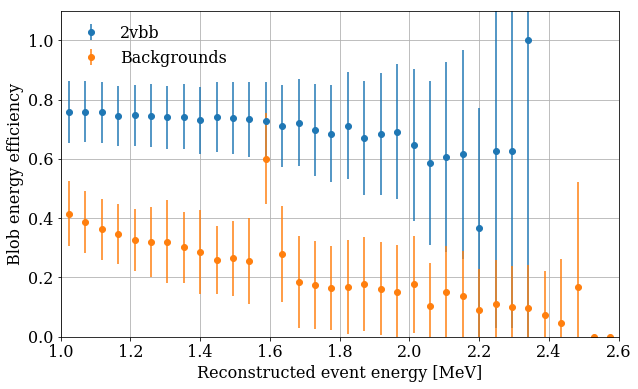

In [266]:
'''
Blob energy: (eblob2 > Ethreshold)
'''

plt.figure(figsize=(10,6))

ebins = np.linspace(1,2.6,35)
bin_centers = (ebins[:-1] + ebins[1:])/2.

df_particles_cut5 = df_particles_cut4[df_particles_cut4['reco_eblob2']*1000 > 355.55*(1-np.exp(-0.00133*df_particles_cut4['reco_energy']*1000))]
df_bgparticles_cut5 = df_bgparticles_cut4[df_bgparticles_cut4['reco_eblob2']*1000 > 355.55*(1-np.exp(-0.00133*df_bgparticles_cut4['reco_energy']*1000))]

energy_counts_ovrl,_ = np.histogram(df_particles_cut4.groupby('event')['reco_energy'].first(), bins=ebins)
energy_counts_blob,_ = np.histogram(df_particles_cut5.groupby('event')['reco_energy'].first(), bins=ebins)

bgenergy_counts_ovrl,_ = np.histogram(df_bgparticles_cut4.groupby('event')['reco_energy'].first(), bins=ebins)
bgenergy_counts_blob,_ = np.histogram(df_bgparticles_cut5.groupby('event')['reco_energy'].first(), bins=ebins)

ratio_blob = energy_counts_blob/energy_counts_ovrl
ratio_blob_std = ratio_blob * np.sqrt(1./energy_counts_blob + 1./energy_counts_ovrl)

bgratio_blob = bgenergy_counts_blob/bgenergy_counts_ovrl
bgratio_blob_std = bgratio_blob * np.sqrt(1./bgenergy_counts_blob + 1./bgenergy_counts_ovrl)

plt.errorbar(bin_centers, ratio_blob, yerr=np.sqrt(ratio_blob_std), fmt='o', label='2vbb')
plt.errorbar(bin_centers, bgratio_blob, yerr=np.sqrt(bgratio_blob_std), fmt='o', label='Backgrounds')

plt.grid(True)
plt.xlim(1.,2.6)
plt.ylim(0,1.1)

plt.tick_params(which='major', axis='both', labelsize=16)
plt.xlabel('Reconstructed event energy [MeV]', fontsize=16)
plt.ylabel('Blob energy efficiency', fontsize=16)

plt.legend(loc='upper left', fontsize=16)

/Users/woodruffk/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:12: RuntimeWarning: invalid value encountered in true_divide
  if sys.path[0] == '':
/Users/woodruffk/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:13: RuntimeWarning: divide by zero encountered in true_divide
  del sys.path[0]
/Users/woodruffk/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:16: RuntimeWarning: divide by zero encountered in true_divide
  app.launch_new_instance()
/Users/woodruffk/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:16: RuntimeWarning: invalid value encountered in multiply
  app.launch_new_instance()


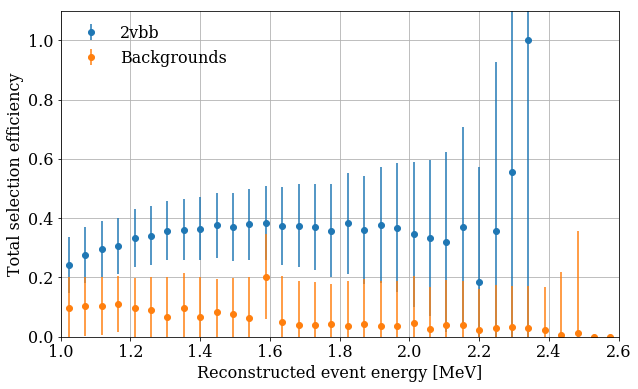

In [267]:
plt.figure(figsize=(10,6))

ebins = np.linspace(1,2.6,35)
bin_centers = (ebins[:-1] + ebins[1:])/2.

energy_counts,_ = np.histogram(df_particles.groupby('event')['reco_energy'].first(), bins=ebins)
energy_counts_blob,_ = np.histogram(df_particles_cut5.groupby('event')['reco_energy'].first(), bins=ebins)

bgenergy_counts,_ = np.histogram(df_bgparticles.groupby('event')['reco_energy'].first(), bins=ebins)
bgenergy_counts_blob,_ = np.histogram(df_bgparticles_cut5.groupby('event')['reco_energy'].first(), bins=ebins)

ratio_final = energy_counts_blob/energy_counts
ratio_final_std = ratio_blob * np.sqrt(1./energy_counts_blob + 1./energy_counts)

bgratio_final = bgenergy_counts_blob/bgenergy_counts
bgratio_final_std = bgratio_blob * np.sqrt(1./bgenergy_counts_blob + 1./bgenergy_counts)

plt.errorbar(bin_centers, ratio_final, yerr=np.sqrt(ratio_final_std), fmt='o', label='2vbb')
plt.errorbar(bin_centers, bgratio_final, yerr=np.sqrt(bgratio_final_std), fmt='o', label='Backgrounds')

plt.grid(True)
plt.xlim(1.,2.6)
plt.ylim(0,1.1)

plt.tick_params(which='major', axis='both', labelsize=16)
plt.xlabel('Reconstructed event energy [MeV]', fontsize=16)
plt.ylabel('Total selection efficiency', fontsize=16)

plt.legend(loc='upper left', fontsize=16)